# Working with Text: Assignment

The assignment consists of 3 questions you will need to answer. You will be creating, from scratch, something akin to the `TfidfVectorizer` in `sklearn`. You can reuse any functions from the lecture notebook if you want, but you don't need them.



# Data & defining functions 

In [ ]:
docs = ['People who see ghosts', #Query guy

        '"I dont believe people who see ghosts", said Mannie, before spitting into the wind and riding his bike down the street at top speed. He then went home and ate peanut-butter and jelly sandwiches all day. Mannie really liked peanut-butter and jelly sandwiches. He ate them so much that his poor mother had to purchase a new jar of peanut butter every afternoon.',

        'People see incredible things. One time I saw some people talking about things they were seeing, and those people were so much fun. They saw clouds and they saw airplanes. They saw dirt and they saw worms. Can you believe the amount of seeing done by these people? People are the best.',

        'This is an article about a circus. A Circus is where people go to see other people who perform great things. Circuses also have elephants and tigers, which generally get a big woop from the crowd.',

        'Lots of people have come down with Coronavirus. You can see the latest numbers and follow our updates on the pandemic below. Please, stay safe.',

        'Goats are lovely creatures. Many people love goats. People who love goats love seeing them play in the fields.',

        'We have collected a report of people in our community seeing ghosts. Each resident was asked "how many ghosts have you seen?", "describe the last ghost you saw", and "tell us about your mother." Afterwards, we compared the ghost reports between the different individuals, and assessed whether or not they were actually seeing these apparitions.']
        #target guy


In [ ]:
#This stop word is provided by sebleier at https://gist.github.com/sebleier/554280
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
#This stop word is made by removing the most frequent and rare words that seemed unrelevent.
#stop_words = ['the', 'and', 'a', 'of', 'about', 'i', 'his', 'he', 'them', 'so', 'much', 'can' , 'are', 'is', 'our', 'in', 'we', 'dont', 'into', 'at', 'then', 'all', 'new', 'not', 'or', 'us', 'your', 'last', 'each', 'on', 'with', 'lot', 'also', 'an', 'by', 'other', 'this', 'done', 'those', 'some']

In [ ]:
# I used re.sub for only preprocessing.
from re import sub
def preprocess(doc, t = 'list'):
  from nltk.stem.snowball import SnowballStemmer
  stemmer = SnowballStemmer('english')
  #Stop word for Eng by Alireza

  if t == 'list':
    for i in range(len(doc)):
      doc[i] = sub('[^\w|\s]', '',doc[i])
      doc[i] = sub('\s+', ' ',doc[i])
      doc[i] = doc[i].casefold()
      for j in range(len(doc[i].split(' '))):
        doc[i] = ' '.join([stemmer.stem(word) for word in doc[i].split(' ')])
      for j in range(len(doc[i].split(' '))):
        doc[i] = ' '.join([word for word in doc[i].split(' ') if word not in stop_words])
  if t == 'string':
    doc = sub('[^\w|\s]', '',doc)
    doc = sub('\s+', ' ',doc)
    doc = doc.casefold()
    for j in range(len(doc.split(' '))):
      doc = ' '.join([stemmer.stem(word) for word in doc.split(' ')])
  return doc

In [ ]:
def ecu_cal(vec):
  n = vec.shape[0]
  euc_dist = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      euc_dist[i][j] = np.linalg.norm(vec[i,:] - vec[j,:])
  return euc_dist

def cosi_cal(vec):
  n = vec.shape[0]
  cosi_dist = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      cosi_dist[i][j] = 1 - np.dot(vec[i,:], vec[j,:])
  return cosi_dist

In [ ]:
def pairwise_distance(X):
    N = X.shape[0]
    dists = np.zeros((N, N))
    for i, a in enumerate(X):
        for j, b in enumerate(X):
            dists[i, j] = np.linalg.norm(a - b)

    return dists

def get_score(vecs):
    dists = pairwise_distance(vecs)
    mxidx = np.argmin(dists[0][1:-1]) + 1
    next_best = np.linalg.norm(vecs[mxidx] - vecs[0]) 
    target = np.linalg.norm(vecs[-1] - vecs[0])
    score = next_best / target
    print('SCORE: ', score)

# Use get_score to check the score for assignment 3!

In [ ]:
# ###################################################################
#                          ASSIGNMENT
# ###################################################################
#
# Create a class (or function), called "Vectorizer" ("vectorizer").
# 
# It should take a list of strings (documents) and turn it into a
# 2D Numpy Array representing the documents as vectors (rows are
# documents). You have flexibility in how exactly they are represented,
# but it should be based on a basic term-frequency vector. 
#
# The vectors should be "normalized" such that each row has
# an l2 norm of 1.
#
# NOTE: You are implementing this in pure Python/Numpy

import numpy as np

def count_words(doc_lst):
  ult_dic = {}
  doc_count = []
  term_bin_count = {}

  for i in doc_lst:
    words = i.split(' ')
    for word in words:
      if word in ult_dic.keys():
        ult_dic[word] += 1
      else:
        ult_dic[word] = 1
  
  for m in range(len(doc_lst)):
    temp_dic = {}
    for n in doc_lst[m].split(' '):
      if n in temp_dic.keys():
        temp_dic[n] += 1
      else:
        temp_dic[n] = 1
    doc_count.append(temp_dic)

  for k in ult_dic.keys():
    term_bin_count[k] = 0
    for s in doc_lst:
      if k in s:
        term_bin_count[k] += 1

  return ult_dic, doc_count, term_bin_count


def tf(d_count, d_ult):
  vec = np.zeros((len(d_count), len(d_ult.keys())))   #Rows are doc and columns are words
  for i in range(len(d_count)):
    for j in range(len(d_ult.keys())):
      if list(d_ult.keys())[j] in d_count[i].keys():
        vec[i][j] = d_count[i][list(d_ult.keys())[j]]/sum(d_count[i].values())
  return vec


if True:  #inverse document frequency smooth (Best scenario)
  def idf(bin_count, N):
    vec = np.zeros((N, len(bin_count.keys())))
    for i in range(N):
      for j in range(len(bin_count.keys())):
        vec[i][j] = np.log(N/(1+bin_count[list(bin_count.keys())[j]]))+1
    return vec
if False: #inverse document frequency
  def idf(bin_count, N):
    vec = np.zeros((N, len(bin_count.keys())))
    for i in range(N):
      for j in range(len(bin_count.keys())):
        vec[i][j] = np.log(N/bin_count[list(bin_count.keys())[j]])
    return vec
if False: #probabilistic inverse document frequency
  def idf(bin_count, N):
    vec = np.zeros((N, len(bin_count.keys())))
    for i in range(N):
      for j in range(len(bin_count.keys())):
        if (N-bin_count[list(bin_count.keys())[j]]) == 0:
          vec[i][j] = 0
        else:
          vec[i][j] = np.log((N-bin_count[list(bin_count.keys())[j]])/(bin_count[list(bin_count.keys())[j]]))
    return vec
#if False: #For Term Frequency Relative Frequency (TF-RF)
  #def RF(bin_count, N):
    #With lemming --> classification --> https://medium.com/analytics-vidhya/how-good-or-bad-is-traditional-tf-idf-text-mining-technique-304aec920009


def norm_l2(vec):
  for i in range(vec.shape[0]):
    vec[i,:] = vec[i,:]/np.linalg.norm(vec[i,:], ord=2)
    #print(np.linalg.norm(vec[i,:]))   #YOU CAN CHECK NORM L2 == 1 HERE
  return vec


                       #main function
def vectorizer(doc_lst, method='tf'): #doc_list should be preprocessed
  if method=='tfidf':
    docs = preprocess(doc_lst)
    ult_dictionary, docu_counter, bin_count= count_words(docs)
  else:
    ult_dictionary, docu_counter, bin_count= count_words(doc_lst)
  #print(sorted(ult_dictionary.items(), key=lambda x: x[1], reverse=True)) #for creating your own stop word
  if method=='tf':
    tf_vec = tf(docu_counter, ult_dictionary)
    return norm_l2(tf_vec)
  if method=='tfidf':
    tf_vec = tf(docu_counter, ult_dictionary)
    idf_vec = idf(bin_count, len(doc_lst))
    return norm_l2((np.log(1+tf_vec))*idf_vec)

# Simple tf:

In [ ]:
vec = vectorizer(docs)

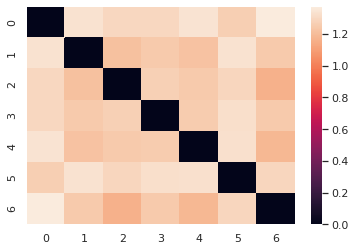

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(ecu_cal(vec))

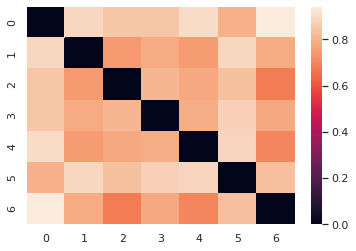

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(cosi_cal(vec))

***Conclusion: these distance measures give similar results.***

In [ ]:
get_score(vec)

SCORE:  0.9222070615875735


***conclusion: Without preprocessing, the score is non-sense.***

# tfidf smooth (Best scenario) with preprocessing 

In [ ]:
new_vec = vectorizer(docs, 'tfidf')

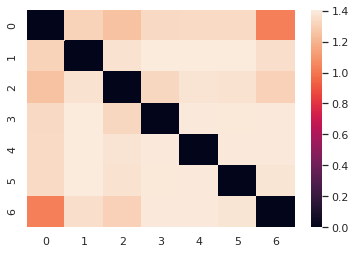

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(ecu_cal(new_vec))

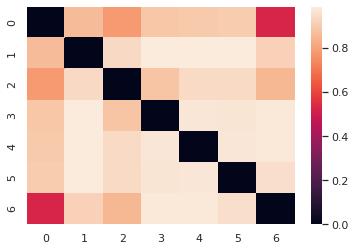

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(cosi_cal(new_vec))

In [ ]:
get_score(new_vec)

SCORE:  1.216430596980755


***Conclusion: After testing different scenarios, the smooth tfidf and preprocessing (stemming, cleaning, stopwords) we get good scores.***